In [1]:
import numpy as np # biblioteca utilizada para trabalhar com vetores
import pandas as pd # biblioteca para trabalhar com dataframes  (Planilhas Excel)
import seaborn as sns # biblioteca usada para criar gráficos mais "bonitos"
import matplotlib.pyplot as plt # biblioteca usada para criar graficos mais comuns, ao estilo Matlab
import google

In [2]:
# abir arquivo csv com os dados que serao usados
clientes = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [3]:
# visualizando 5 primeiras linhas do banco de dados
clientes.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* **Customer ID** = Identificação do Cliente
* **Gender ID** = Genêro do Cliente
* **Age** = Idade
* **Annual Income** = Renda Anual
* **Spending Score (1-100)** = Pontuação de Gastos

In [4]:
#verificando a existencia de campos nulos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#verificando a existencia de campos nulos
clientes.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#adicionando valores nulos
clientes_null = clientes
for col in clientes_null.columns:
    clientes_null.loc[clientes_null.sample(frac = 0.1).index, col] = np.nan

In [7]:
#verificando as colunas nulas
clientes_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#analisando o dataset
clientes_null.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,NaN
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,NaN,17.0,40.0


In [9]:
clientes_null.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [10]:
# deletando linhas que possuem algum valor nulo
clientes_null.dropna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
5,6.0,Female,22.0,17.0,76.0
6,7.0,Female,35.0,18.0,6.0
...,...,...,...,...,...
194,195.0,Female,47.0,120.0,16.0
195,196.0,Female,35.0,120.0,79.0
196,197.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,126.0,74.0


In [11]:
# preenchendo os valores NaN com o valor 0
clientes_null.fillna(0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,0.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,0.0,17.0,40.0
...,...,...,...,...,...
195,196.0,Female,35.0,120.0,79.0
196,197.0,Female,45.0,126.0,28.0
197,198.0,Male,32.0,126.0,74.0
198,199.0,Male,32.0,137.0,18.0


In [12]:
# encontra as estatisticas do dataset
clientes_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,100.511111,38.800000,60.900000,50.461111
std,58.121765,14.280275,27.036516,25.463165
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.000000,40.000000,35.000000
50%,101.500000,36.000000,62.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,199.000000,70.000000,137.000000,99.000000


In [13]:
# preenchendo os valores medios da coluna
clientes_null.fillna(clientes_null.mean())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,Male,19.0,15.0,50.461111
1,2.000000,Male,21.0,15.0,81.000000
2,3.000000,Female,20.0,16.0,6.000000
3,4.000000,Female,23.0,16.0,77.000000
4,5.000000,Female,38.8,17.0,40.000000
...,...,...,...,...,...
195,196.000000,Female,35.0,120.0,79.000000
196,197.000000,Female,45.0,126.0,28.000000
197,198.000000,Male,32.0,126.0,74.000000
198,199.000000,Male,32.0,137.0,18.000000


In [14]:
# analisando o banco de dados
clientes.describe() #funcao que retorna uma analise superficial dos dados

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,100.511111,38.800000,60.900000,50.461111
std,58.121765,14.280275,27.036516,25.463165
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.000000,40.000000,35.000000
50%,101.500000,36.000000,62.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,199.000000,70.000000,137.000000,99.000000


* **count** = número de elementos (linhas) existentes no banco de dados
* **mean** = média dos valores na coluna
* **std** = desvio padrão dos dados presentes na coluna
* **min** = menor valor existente na coluna 
* **25%** = primeiro quartil dos dados (25%)
* **50%** = segundo quartil dos dados (50%)
* **75%** = terceiro quartil dos dados (75%)
* **max** = valor máximo existente na coluna

**Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o boxplot**

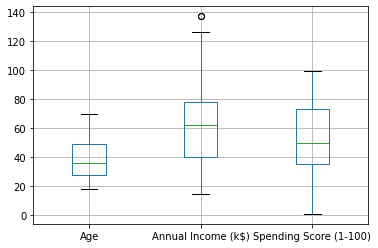

In [15]:
#constroi o boxplot para as colunas desejadas
boxplot = clientes.boxplot(column = ['Age','Annual Income (k$)', 'Spending Score (1-100)' ])

Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado Z-Score.

In [16]:
# Z-Score
from scipy import stats
z = np.abs(stats.zscore(clientes['Annual Income (k$)'].values))
threshold = 2
result = np.where(z>threshold)

df_salario_outlier = clientes.iloc[result[0]]
#print(z)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [17]:
# todos os usuarios com salario anual com possivel outlier
df_salario_outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


**Explorando os dados.Entendendo alguns relacionamentos e comportamentos dos clientes**

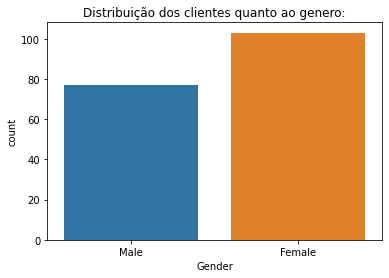

In [18]:
# analisando a distribuição dos clientes por genero
sns.countplot(x= 'Gender', data = clientes); # cria o gráfico que conta a quantidade de consumidores existentes em cada um dos generos
plt.title('Distribuição dos clientes quanto ao genero:'); #adiciona o titulo no gráfico

**Distribuição dos consumidores pela idade**

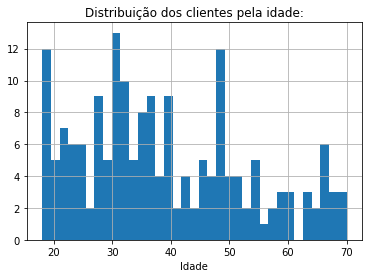

In [19]:
# analisando a distribuição dos clientes quanto a idade através do histograma
clientes.hist('Age', bins = 35); # seleciona a coluna idade para realizar o histograma
                                 # os 'bins' indicam a quantidade de grupos que se desejam obter os dados
plt.title('Distribuição dos clientes pela idade:'); # adiciona o titulo no gráfico (histograma)
plt.xlabel('Idade');

**Aplicando a codificação dos dados.**

In [20]:
cat_df_clientes = clientes.select_dtypes(include = ['object']) # copiando as colunas que são do tipo categóricas

In [21]:
cat_df_clientes.head();

**Aplicando o mapeamento**

In [22]:
replace_map = {'Gender': {'Male': 1, 'Female': 2}} # define o dicionário a ser utilizado (map)
labels =  cat_df_clientes['Gender'].astype('category').cat.categories.tolist() # encontra as lista das variáveis categóricas
replace_map_comp = {'Gender':{k:v for k,v in zip(labels, list (range(1,len(labels)+1)))}} #define o mapeamento

print(replace_map_comp)

{'Gender': {'Female': 1, 'Male': 2}}


In [23]:
cat_df_clientes_replace = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv') # realiza a cópia do dataset

In [24]:
cat_df_clientes_replace.replace(replace_map_comp, inplace = True) # aplica o mapeamento para o dataSet
cat_df_clientes_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


**Aplicando o label encodering**

In [26]:
#cat_df_customers.lc = customers 
clientes = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [28]:
cat_df_clientes_lc = clientes

In [32]:
cat_df_clientes_lc['Gender'] = pd.Categorical(cat_df_clientes_lc['Gender'])
cat_df_clientes_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [33]:
cat_df_clientes_lc['Gender'] = cat_df_clientes_lc['Gender'].cat.codes
cat_df_clientes_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [34]:
# importando o label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # instanciando o objeto

In [35]:
# aplicando a codificação para as colunas categóricas
clientes_labels = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
clientes_labels['Gender'] = le.fit_transform(customers_label['Gender'])
clientes_labels.head()

'../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'

**One Hot Encoding**

In [41]:
#Get dummies
clientes_one_hot = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
# clientes_one_hot['Gender']=pd.Categorical(clientes_one_hot['Gender'])
clientes_one_hot = pd.get_dummies(clientes_one_hot)
# cliente_one_hot.head()
clientes_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [42]:
clientes = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [43]:
# import OneHotEncoder
clientes_one_hot = clientes 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder() # instancia o objeto

In [44]:
# aplica o OneHotEncoder para a Coluna
clientes_ohe = ohe.fit_transform(clientes_one_hot['Gender'].values.reshape(-1,1)).toarray() # retorna uma array do numpy
clientes_ohe.shape

(200, 2)

In [ ]:
clientes_ohe